# Lab 6
### Segmentation 1

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

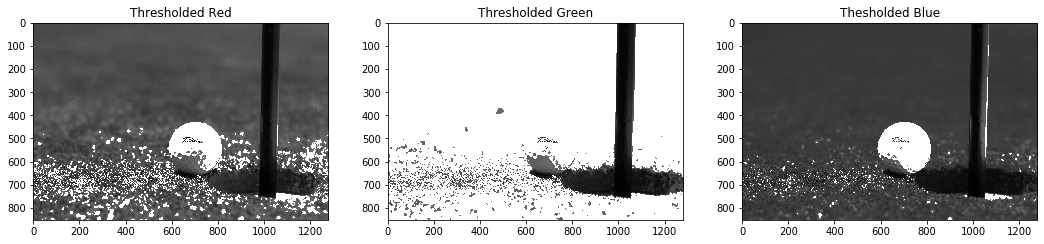

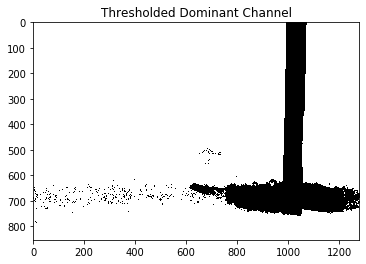

In [3]:
# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)

# read image golf

img = io.imread("imgs/exp1/golf.jpeg")
img = img.astype(float)

# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)
Red = img[:,:,0]
Green = img[:,:,1]
Blue = img[:,:,2]
# 3- Visually (not by code) detect the dominating color channel (C) for the background(R, G or B)

## RGB (33,55,27) Dominating channel is Green(greatest)

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)

thresholdedRed = np.copy(Red)
thresholdedGreen = np.copy(Green)
thresholdedBlue = np.copy(Blue)

thresholdedRed[thresholdedRed>110] = 255
thresholdedGreen[thresholdedGreen>110] = 255
thresholdedBlue[thresholdedBlue>110] = 255

show_images([thresholdedRed,thresholdedGreen,thresholdedBlue],["Thresholded Red","Thresholded Green","Thesholded Blue"])

# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold

dominatingChannel = np.argmax([np.sum(Red),np.sum(Green),np.sum(Blue)])

# 6- display the binarized image

show_images([ img[:,:,dominatingChannel] > threshold_otsu(img[:,:,dominatingChannel]) ],["Thresholded Dominant Channel"])


In [45]:
def function(mask):
    # 1- Get the required RGB color (Using a color picker)

    ## RGB (33,55,27)

    # 2- Read image
    img = io.imread("imgs/exp2/cufe.png")
    img = img.astype(float)

    # 3- extract R, G and B channels (as float)
    Red = img[:,:,0]
    Green = img[:,:,1]
    Blue = img[:,:,2]
    # 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)

    diffRed = np.copy(Red)
    diffGreen= np.copy(Green)
    diffBlue= np.copy(Blue)

    diffRed -= Mask[0]
    diffGreen -= Mask[1]
    diffBlue -= Mask[2]

    # 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)
    distanceMat = np.sqrt( np.add(diffRed*diffRed , diffGreen*diffGreen , diffBlue*diffBlue )) 
    #distance = np.sum(distanceMat)

    # 6-  create a mask by thresholding the differences

    thresholdMat = distanceMat <= 90
    img[thresholdMat==False] = 0.0
    show_images([img],["Thresholded Image"])
    
    # thresholdRed = np.mean(np.absolute(diffRed))
    # thresholdGreen = np.mean(np.absolute(diffGreen))
    # thresholdBlue =np.mean(np.absolute(diffBlue))

    # thresholdedImg = np.copy(img)
    # thresholdedImg[:,:,0][ thresholdedImg[:,:,0] > thresholdRed]= 0
    # thresholdedImg[:,:,1][ thresholdedImg[:,:,1] > thresholdGreen]= 0
    # thresholdedImg[:,:,2][ thresholdedImg[:,:,2] > thresholdBlue]= 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


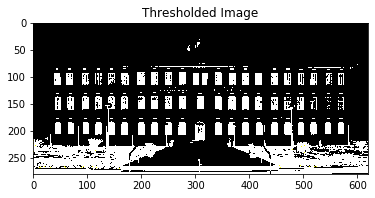

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


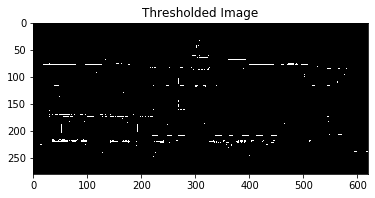

In [46]:
Mask = [29,38,15]
function(Mask)
# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40
Mask = [230,90,40]
# 8- show the image or save it
function(Mask)